In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.decomposition import NMF

In [2]:
# Construct a low rank matrix
#
Wtrue = np.random.rand(40,5)
Htrue = np.random.rand(5,10)
V0 = Wtrue @ Htrue
print(V0.shape)
# Dimensions of data
#
m, n = V0.shape
# Normalise columnwise
#
V = np.zeros((m,n))
for i in range(n):
    V[:,i] = V0[:,i] / np.max(V0[:,i])

(40, 10)


5.5549995446399495e-15


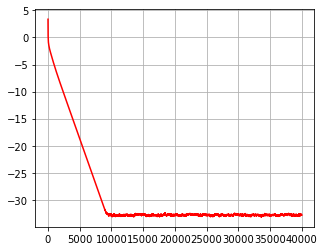

In [3]:
# Specify the rank
#
r = 8;


    
# Initialize
#
W = np.random.rand(m,r);
H = np.random.rand(r,n);

MaxIter = 40000
f = np.zeros((MaxIter,1))
# Initial error
#
f[0] = np.linalg.norm(V - W @ H, ord='fro');
e = 1.0e-10

for iter in range(MaxIter-1):
    # Update W
    #
    VH_T = V@H.T
    WHH_T =  W@H@H.T

    for i in range(np.size(W, 0)):
        for j in range(np.size(W, 1)):
            W[i, j] = W[i, j] * VH_T[i, j] / WHH_T[i, j]
    # Update H
    #
    W_TV = W.T@V
    W_TWH = W.T@W@H
    for i in range(np.size(H, 0)):
        for j in range(np.size(H, 1)):
            H[i, j] = H[i, j] * W_TV[i, j] / W_TWH[i, j]
    # Measure Error
    #
    f[iter+1] = np.linalg.norm(V - W @ H, ord='fro')
    
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(np.arange(MaxIter), np.log(f), c='r')
ax.grid(True)
print(np.linalg.norm(V - W @ H, ord='fro'))

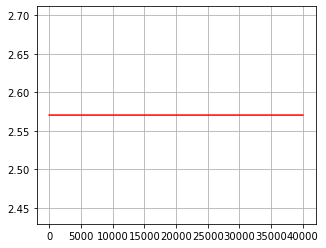

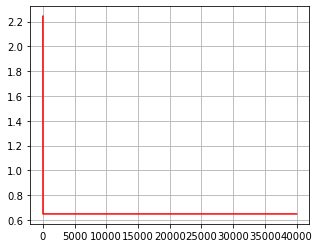

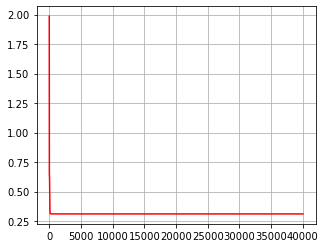

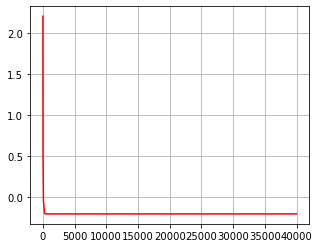

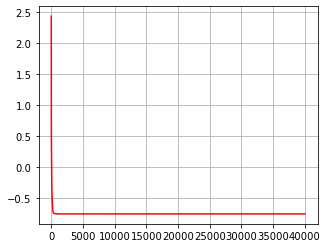

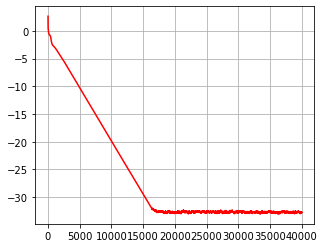

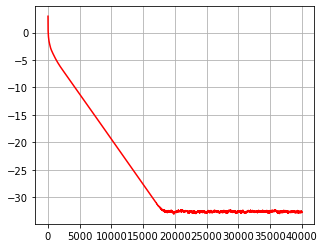

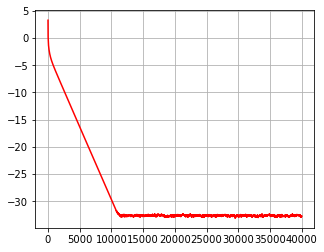

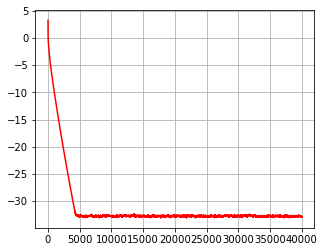

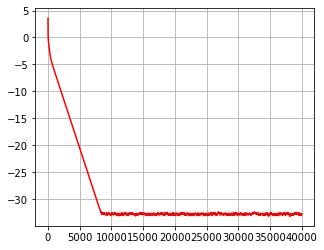

In [4]:
R=np.zeros((10))
for r in range (10):
    # Initialize
    #
    W = np.random.rand(m,r);
    H = np.random.rand(r,n);

    MaxIter = 40000
    f = np.zeros((MaxIter,1))
    # Initial error
    #
    f[0] = np.linalg.norm(V - W @ H, ord='fro');
    e = 1.0e-10

    for iter in range(MaxIter-1):
        # Update W
        #
        VH_T = V@H.T
        WHH_T =  W@H@H.T

        for i in range(np.size(W, 0)):
            for j in range(np.size(W, 1)):
                W[i, j] = W[i, j] * VH_T[i, j] / WHH_T[i, j]
        # Update H
        #
        W_TV = W.T@V
        W_TWH = W.T@W@H
        for i in range(np.size(H, 0)):
            for j in range(np.size(H, 1)):
                H[i, j] = H[i, j] * W_TV[i, j] / W_TWH[i, j]
        # Measure Error
        #
        f[iter+1] = np.linalg.norm(V - W @ H, ord='fro')
    fig, ax = plt.subplots(figsize=(5,4))
    ax.plot(np.arange(MaxIter), np.log(f), c='r')
    ax.grid(True)
    R[r]=np.linalg.norm(V - W @ H, ord='fro')

(9,)
[1. 2. 3. 4. 5. 6. 7. 8. 9.]


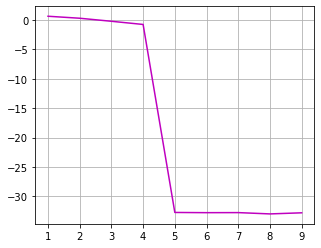

In [5]:
plotY=np.linspace(1, 9, 9)
print(plotY.shape)
print(plotY)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(plotY, np.log(R[1:10]), c='m')
ax.grid(True)

(9,)
[1. 2. 3. 4. 5. 6. 7. 8. 9.]


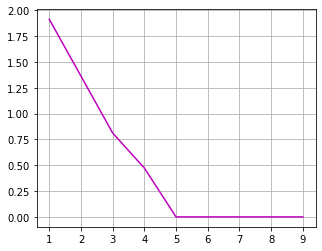

In [6]:
plotY=np.linspace(1, 9, 9)
print(plotY.shape)
print(plotY)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(plotY, R[1:10], c='m')
ax.grid(True)

In [7]:
print(R)

[1.30721784e+01 1.91471020e+00 1.36398771e+00 8.12760106e-01
 4.72932478e-01 6.01604903e-15 5.80383621e-15 5.86431372e-15
 4.69290892e-15 5.66404190e-15]


In [8]:
R2=np.zeros((10))
r=1
for i in range (9):
    model = NMF(n_components=r, init='random', random_state=0)
    W = model.fit_transform(V)
    H = model.components_
    R2[r]=np.linalg.norm(V - W @ H, ord='fro')
    r+=1

C:\Users\omsin\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\omsin\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(9,)
[1. 2. 3. 4. 5. 6. 7. 8. 9.]


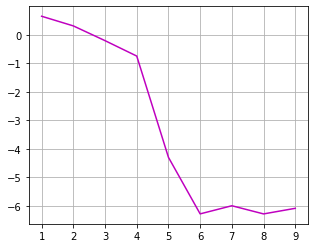

In [9]:
plotY=np.linspace(1, 9, 9)
print(plotY.shape)
print(plotY)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(plotY, np.log(R2[1:10]), c='m')
ax.grid(True)

(9,)
[1. 2. 3. 4. 5. 6. 7. 8. 9.]


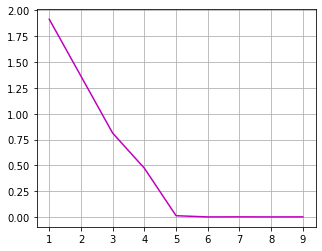

In [10]:
plotY=np.linspace(1, 9, 9)
print(plotY.shape)
print(plotY)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(plotY, R2[1:10], c='m')
ax.grid(True)

In [11]:
print(R2)

[0.00000000e+00 1.91471020e+00 1.36398991e+00 8.12763904e-01
 4.73150770e-01 1.35305729e-02 1.86015198e-03 2.47475652e-03
 1.85769800e-03 2.26097077e-03]


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Specify the rank
#
r = 20;

E = pd.read_excel("Equities.xlsx", verbose=False)
YE=E.values
Y=YE[:,1]
print(Y.shape)
print(Y)
E.drop(['Name','FTSE100'],axis=1,inplace=True)
V0=E.values
print(V0.shape)
print(V0)

Vtrain=V0[0:983,:]
print(Vtrain.shape)
Vtest=V0[983:1966,:]
print(Vtest.shape)

Ytrain=Y[0:983]
print(Ytrain.shape)
Ytest=Y[983:1966]
print(Ytest.shape)



(1966,)
[5092.2300000000005 5040.76 5095.3 ... 7151.12 7107.2 7074.7300000000005]
(1966, 95)
[[1492.  2299.  1170.  ...  526.5  601.   204.3]
 [1495.  2238.5 1183.  ...  507.5  590.   202. ]
 [1521.  2249.5 1212.  ...  518.5  578.5  203.4]
 ...
 [2182.  2051.5  968.8 ...  545.   842.8  958. ]
 [2169.  2030.   964.4 ...  538.8  832.6  935.4]
 [2182.  2003.5  936.8 ...  520.4  825.8  945.8]]
(983, 95)
(983, 95)
(983,)
(983,)


(1966,)
[0.00000000e+00 1.00050891e+00 2.00101781e+00 ... 1.96399898e+03
 1.96499949e+03 1.96600000e+03]


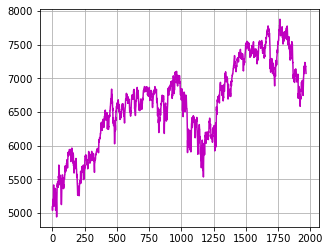

In [13]:
plotY=np.linspace(0, 1966, 1966)
print(plotY.shape)
print(plotY)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(plotY, Y, c='m')
ax.grid(True)

4.336093816410616


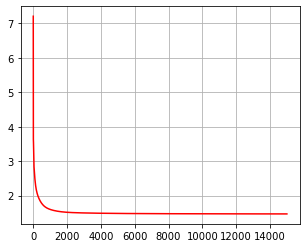

In [14]:
# Dimensions of data
#
m, n = Vtrain.shape

# Normalise columnwise
#
V = np.zeros((m,n))
for i in range(n):
    V[:,i] = Vtrain[:,i] / np.max(Vtrain[:,i])

# Initialize
#
W = np.random.rand(m,r);
H = np.random.rand(r,n);

MaxIter = 15000
f = np.zeros((MaxIter,1))
# Initial error
#
f[0] = np.linalg.norm(V - W @ H, ord='fro');
e = 1.0e-10

for iter in range(MaxIter-1):
    # Update W
    #
    VH_T = V@H.T
    WHH_T =  W@H@H.T

    for i in range(np.size(W, 0)):
        for j in range(np.size(W, 1)):
            W[i, j] = W[i, j] * VH_T[i, j] / WHH_T[i, j]
    # Update H
    #
    W_TV = W.T@V
    W_TWH = W.T@W@H
    for i in range(np.size(H, 0)):
        for j in range(np.size(H, 1)):
            H[i, j] = H[i, j] * W_TV[i, j] / W_TWH[i, j]
    # Measure Error
    #
    f[iter+1] = np.linalg.norm(V - W @ H, ord='fro')
    
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(np.arange(MaxIter), np.log(f), c='r')
ax.grid(True)
print(np.linalg.norm(V - W @ H, ord='fro'))

4.794626513767304


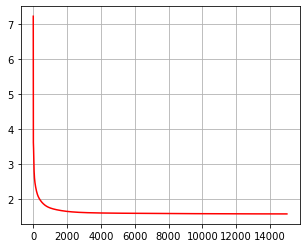

In [15]:
# Dimensions of data
#
m, n = Vtest.shape

# Normalise columnwise
#
V = np.zeros((m,n))
for i in range(n):
    V[:,i] = Vtest[:,i] / np.max(Vtest[:,i])

# Initialize
#

W = np.random.rand(m,r);

MaxIter = 15000
f = np.zeros((MaxIter,1))
# Initial error
#
f[0] = np.linalg.norm(V - W @ H, ord='fro');
e = 1.0e-10

for iter in range(MaxIter-1):
    # Update W
    #
    VH_T = V@H.T
    WHH_T =  W@H@H.T

    for i in range(np.size(W, 0)):
        for j in range(np.size(W, 1)):
            W[i, j] = W[i, j] * VH_T[i, j] / WHH_T[i, j]
    # Update H
    #
    W_TV = W.T@V
    W_TWH = W.T@W@H
    for i in range(np.size(H, 0)):
        for j in range(np.size(H, 1)):
            H[i, j] = H[i, j] * W_TV[i, j] / W_TWH[i, j]
    # Measure Error
    #
    f[iter+1] = np.linalg.norm(V - W @ H, ord='fro')
    
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(np.arange(MaxIter), np.log(f), c='r')
ax.grid(True)
print(np.linalg.norm(V - W @ H, ord='fro'))

In [16]:
Wsum=np.zeros((983))
for i in range(np.size(W, 0)):
    for j in range(np.size(W, 1)):
        Wsum[i]+=W[i,j]
        
for i in range(np.size(Wsum)):
    Wsum[i] = Wsum[i]/ np.max(Wsum)
        
for i in range(np.size(Ytest)):
    Ytest[i] = Ytest[i]/ np.max(Ytest)
    
X_axis=np.linspace(0, 983, 983)
print(X_axis.shape) 

n=1
Eq=np.zeros((983,r))
check=np.zeros((r))
Eqsum=np.zeros((983))
for i in range(np.size(Eq, 1)):
    rd = np.floor(np.random.rand()*np.size(V0, 1)).astype(int)
    for j in range(len(check)):
        if check[j]==rd:
            while n > 0:
                rd = np.floor(np.random.rand()*np.size(V0, 1)).astype(int)
                if check[j]!=rd:
                    break
    check[i]=rd
    Eq[:,i]=Vtest[:,rd]
print(check)
print(Eq.shape)
print(Eq)
for i in range(np.size(Eq, 1)):
    Eq[:,i] = Eq[:,i] / np.max(Eq[:,i])
print(Eq)
for i in range(np.size(Eq, 0)):
    for j in range(np.size(Eq, 1)):
        Eqsum[i]+=Eq[i,j]
        
for i in range(np.size(Eqsum)):
    Eqsum[i] = Eqsum[i]/ np.max(Eqsum)

(983,)
[46.  9. 62. 90. 59. 58.  9. 66. 50. 69. 86. 31. 29. 80.  4. 94. 19. 18.
 79. 73.]
(983, 20)
[[ 267.5  598.5 1091.  ... 3181.  1193.  3374. ]
 [ 269.6  602.5 1099.  ... 3224.  1219.  3406. ]
 [ 268.6  600.5 1106.  ... 3210.  1201.  3406. ]
 ...
 [ 276.8  589.2 1730.  ... 4309.  1451.5 2771. ]
 [ 276.5  599.2 1712.5 ... 4210.  1439.  2725. ]
 [ 280.6  599.  1729.  ... 4216.  1430.5 2735. ]]
[[0.93466108 0.855      0.61223345 ... 0.59126394 0.66240977 0.89424861]
 [0.9419986  0.86071429 0.61672278 ... 0.59925651 0.6768462  0.90272992]
 [0.93850454 0.85785714 0.62065095 ... 0.59665428 0.66685175 0.90272992]
 ...
 [0.96715584 0.84171429 0.9708193  ... 0.80092937 0.80594114 0.73442884]
 [0.96610762 0.856      0.96099888 ... 0.78252788 0.79900056 0.72223695]
 [0.98043326 0.85571429 0.97025814 ... 0.78364312 0.79428096 0.72488736]]


0.9784588262988746


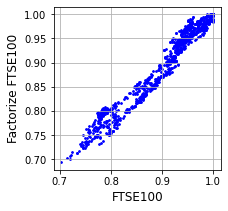

In [17]:
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(Ytest, Wsum, c='b', s=3)
ax.grid(True)
ax.set_xlabel("FTSE100", fontsize=12)
ax.set_ylabel("Factorize FTSE100", fontsize=12)
C1=scipy.stats.pearsonr(Ytest, Wsum)
print(C1[0])

0.9460903514701646


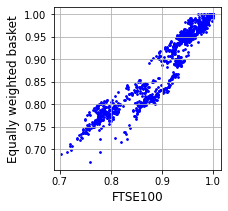

In [18]:
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(Ytest, Eqsum, c='b', s=3)
ax.grid(True)
ax.set_xlabel("FTSE100", fontsize=12)
ax.set_ylabel("Equally weighted basket", fontsize=12)
C2=scipy.stats.pearsonr(Ytest, Eqsum)
print(C2[0])

0.9596493927030896


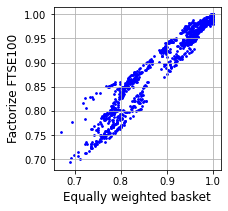

In [19]:
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(Eqsum, Wsum, c='b', s=3)
ax.grid(True)
ax.set_xlabel("Equally weighted basket", fontsize=12)
ax.set_ylabel("Factorize FTSE100", fontsize=12)
C3=scipy.stats.pearsonr(Eqsum, Wsum)
print(C3[0])

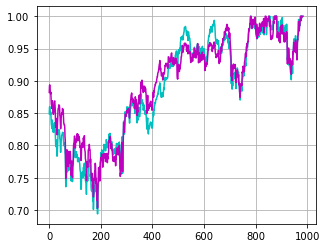

In [20]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(X_axis, Wsum, c='c')
ax.plot(X_axis, Ytest, c='m')
ax.grid(True)  

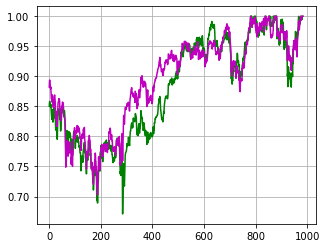

In [21]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(X_axis, Eqsum, c='g')
ax.plot(X_axis, Ytest, c='m')
ax.grid(True)  

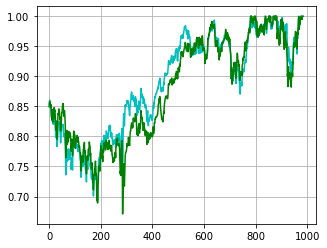

In [22]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(X_axis, Wsum, c='c')
ax.plot(X_axis, Eqsum, c='g')
ax.grid(True) 

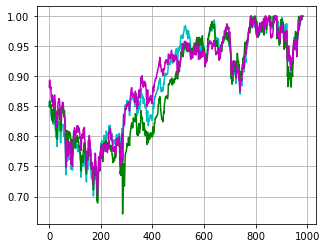

In [23]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(X_axis, Wsum, c='c')
ax.plot(X_axis, Eqsum, c='g')
ax.plot(X_axis, Ytest, c='m')
ax.grid(True) 

In [24]:
Wsum=np.zeros((100,983))
count=0
for r in range (100):
    # Dimensions of data
    #
    m, n = Vtrain.shape

    # Normalise columnwise
    #
    V = np.zeros((m,n))
    for i in range(n):
        V[:,i] = Vtrain[:,i] / np.max(Vtrain[:,i])

    v=np.random.rand(40,10)
    # Initialize
    #
    W = np.random.rand(m,r);
    H = np.random.rand(r,n);

    MaxIter = 15000
    f = np.zeros((MaxIter,1))
    # Initial error
    #
    f[0] = np.linalg.norm(V - W @ H, ord='fro');
    e = 1.0e-10

    for iter in range(MaxIter-1):
        # Update W
        #
        VH_T = V@H.T
        WHH_T =  W@H@H.T
    
        for i in range(np.size(W, 0)):
            for j in range(np.size(W, 1)):
                W[i, j] = W[i, j] * VH_T[i, j] / WHH_T[i, j]
        # Update H
        #
        W_TV = W.T@V
        W_TWH = W.T@W@H
        for i in range(np.size(H, 0)):
            for j in range(np.size(H, 1)):
                H[i, j] = H[i, j] * W_TV[i, j] / W_TWH[i, j]
        # Measure Error
        #
        f[iter+1] = np.linalg.norm(V - W @ H, ord='fro')
    
    # Dimensions of data
    #
    m, n = Vtest.shape

    # Normalise columnwise
    #
    V = np.zeros((m,n))
    for i in range(n):
        V[:,i] = Vtest[:,i] / np.max(Vtest[:,i])

    v=np.random.rand(40,10)
    # Initialize
    #

    W = np.random.rand(m,r);

    MaxIter = 15000
    f = np.zeros((MaxIter,1))
    # Initial error
    #
    f[0] = np.linalg.norm(V - W @ H, ord='fro');
    e = 1.0e-10

    for iter in range(MaxIter-1):
        # Update W
        #
        VH_T = V@H.T
        WHH_T =  W@H@H.T
    
        for i in range(np.size(W, 0)):
            for j in range(np.size(W, 1)):
                W[i, j] = W[i, j] * VH_T[i, j] / WHH_T[i, j]
        # Update H
        #
        W_TV = W.T@V
        W_TWH = W.T@W@H
        for i in range(np.size(H, 0)):
            for j in range(np.size(H, 1)):
                H[i, j] = H[i, j] * W_TV[i, j] / W_TWH[i, j]
        # Measure Error
        #
        f[iter+1] = np.linalg.norm(V - W @ H, ord='fro')
    
    for i in range(np.size(W, 0)):
        for j in range(np.size(W, 1)):
            Wsum[r,i]+=W[i,j]
        
    for i in range(np.size(Wsum[r])):
        Wsum[r,i] = Wsum[r,i]/ np.max(Wsum[r])
    count+=1
    print(count)

<ipython-input-24-73d9483bce51>:95: RuntimeWarning: invalid value encountered in double_scalars
  Wsum[r,i] = Wsum[r,i]/ np.max(Wsum[r])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


KeyboardInterrupt: 